# Tomato Ripeness Detection
Using transfer learning, creating a model that detects and classifies if a tomato is ripe

In [ ]:
!pip install pylabel

: 

In [141]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...


Obtaining file:///F:/Code%20Repos/CSCI316-Proj2/detectron2_repo
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build editable did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Traceback (most recent call last):
        File "F:\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "F:\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "F:\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 132, in get_requires_for_build_editable
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\moham\AppData\Local\Temp\pip-build-env-964r9s4l\overlay\Lib\site-packages\setuptools\build_meta.py", line 448, in get_re

In [55]:
# for my sanity
try:
    import google.colab
    PATH_TO_IMAGES = "/content/tomatod/images/train"
    PATH_TO_ANNOTATIONS =  "/content/tomatod/annotations/tomatOD_train.json"
except ImportError:
    PATH_TO_IMAGES = "F:\\Code Repos\\CSCI316-Proj2\\tomatod\\images\\train"
    PATH_TO_ANNOTATIONS = "tomatod\\annotations\\tomatOD_train.json"

In [22]:
api_token = {"username":"mohammedejazzur","key":"b546bbf6eb9f6c5858a0b55c030590ec"}

import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
# import kaggle
from pylabel import importer

## Loading Data

In [ ]:
!kaggle datasets download "nexuswho/tomatod" -d "/content/tomatod/"
!unzip "/content/tomatod.zip" -d "/content/tomatod/"

In [57]:
#Import the dataset into the pylabel schema
dataset = importer.ImportCoco(PATH_TO_ANNOTATIONS, path_to_images=PATH_TO_IMAGES, name="BCCD_coco")
dataset.df[dataset.df['img_filename'] == 'stereo20190405_132743_p0_snap_488.jpg']

img_folder  \
id                                                     
0   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
2   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
3   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
4   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
5   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
6   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
7   F:\Code Repos\CSCI316-Proj2\tomatod\images\train   

                             img_filename img_path  img_id  img_width  \
id                                                                      
0   stereo20190405_132743_p0_snap_488.jpg                0       1000   
1   stereo20190405_132743_p0_snap_488.jpg                0       1000   
2   stereo20190405_132743_p0_snap_488.jpg                0       1000   
3   stereo20190405_132743_p0_snap_488.jpg                0       1000   
4   stereo20190405_132743_p0_snap_488.jpg                0       1000   
5   stereo20190405_132743_p0_snap_488.jpg                0       1000   
6   stereo20190405_132743_p0_snap_488.jpg                0       1000   
7   stereo20190405_132743_p0_snap_488.jpg                0       1000   

    img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                                    ...   
0         1000                                    880            652  ...   
1         1000                                    561            690  ...   
2         1000                                    852            913  ...   
3         1000                                    534            930  ...   
4         1000                                    473            165  ...   
5         1000                                    637            154  ...   
6         1000                                    545            303  ...   
7         1000                                    554            391  ...   

    ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  ann_difficult cat_id  \
id                                                                              
0                                                                           1   
1                                                                           3   
2                                                                           3   
3                                                                           3   
4                                                                           1   
5                                                                           1   
6                                                                           1   
7                                                                           1   

      cat_name cat_supercategory split annotated  
id                                                
0       unripe            tomato               1  
1   fully-ripe            tomato               1  
2   fully-ripe            tomato               1  
3   fully-ripe            tomato               1  
4       unripe            tomato               1  
5       unripe            tomato               1  
6       unripe            tomato               1  
7       unripe            tomato               1  

[8 rows x 26 columns]

In [58]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 222
Number of classes: 3
Classes:['unripe', 'semi-ripe', 'fully-ripe']
Class counts:
cat_name
unripe        1301
fully-ripe     332
semi-ripe      320
Name: count, dtype: int64
Path to annotations:
tomatod\annotations


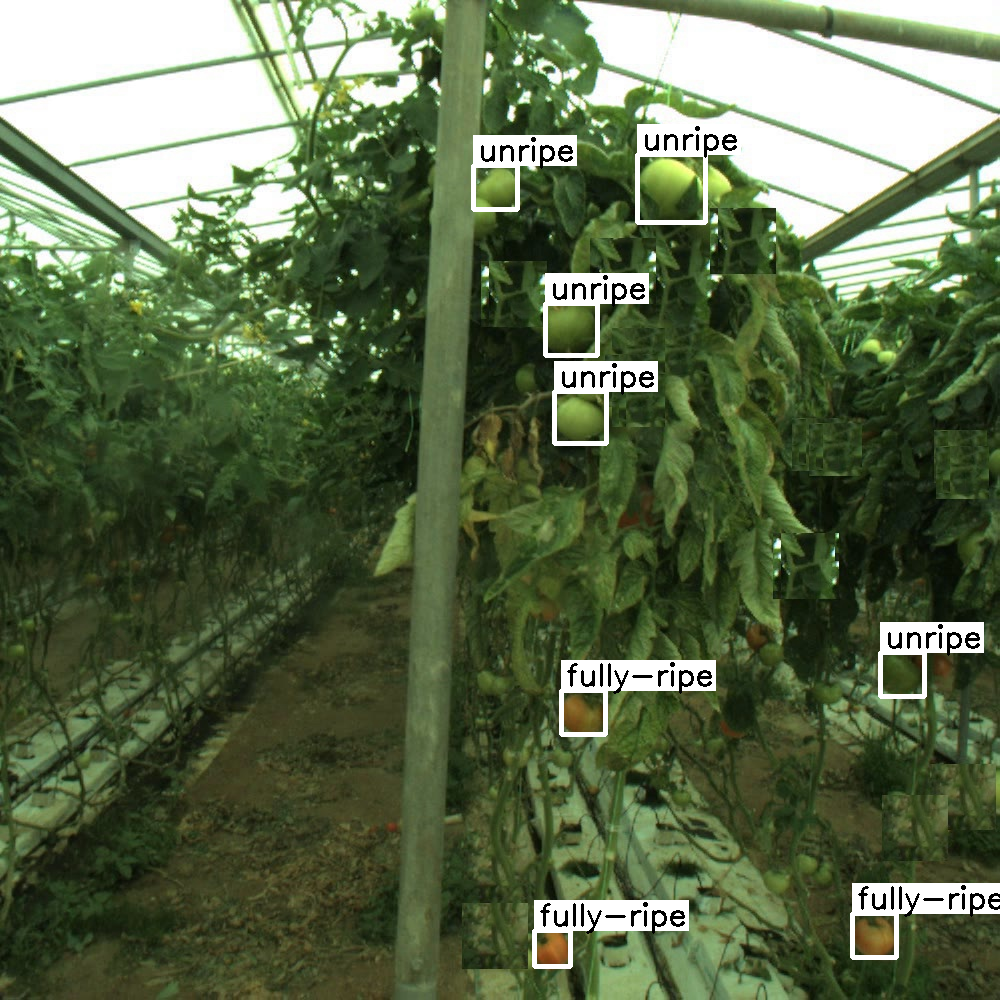

In [59]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(0))

## EDA

### Visualizing class balance of fully-ripe, semi-ripe, unripe

In [31]:
import matplotlib.pyplot as plt

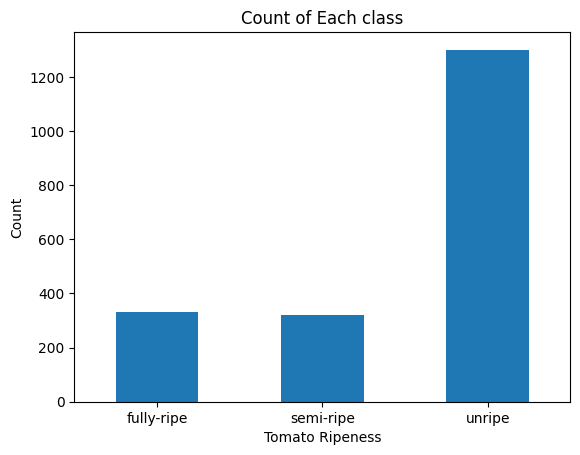

In [51]:
dataset.df['cat_name'].value_counts().sort_index().plot(kind='bar')

plt.xticks(rotation=360)

plt.xlabel('Tomato Ripeness')
plt.ylabel('Count')
plt.title('Count of Each class')

plt.show()

This shows that the unripe class has significantly more data than fully-ripe and semi-ripe.
To prevent, bias, we lower the unripe amount to the same as the other two classes

Since this is an image classification problem, we can use Data Augmentation or Under-sampling to fix the imbalance. 

## Data Balancing

_Something's not right_

Fixing the class imbalance through two possible means:

1. Undersampling
2. Data Augmentation

### Undersampling

In [90]:
# Minority classes
minority_condition = (dataset.df['cat_name'] == 'semi-ripe') | (dataset.df['cat_name'] == 'fully-ripe') 
minority_df = dataset.df[minority_condition]
minority_df

img_folder  \
id                                                       
1     F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
2     F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
3     F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
8     F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
10    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
...                                                ...   
1941  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1942  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1943  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1944  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1946  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   

                               img_filename img_path  img_id  img_width  \
id                                                                        
1     stereo20190405_132743_p0_snap_488.jpg                0       1000   
2     stereo20190405_132743_p0_snap_488.jpg                0       1000   
3     stereo20190405_132743_p0_snap_488.jpg                0       1000   
8     stereo20190405_132743_p0_snap_493.jpg                1       1000   
10    stereo20190405_132743_p0_snap_493.jpg                1       1000   
...                                     ...      ...     ...        ...   
1941  stereo20190406_065607_p0_snap_436.jpg              274       2000   
1942  stereo20190406_065607_p0_snap_436.jpg              274       2000   
1943  stereo20190406_065607_p0_snap_436.jpg              274       2000   
1944  stereo20190406_065607_p0_snap_436.jpg              274       2000   
1946  stereo20190406_065607_p0_snap_436.jpg              274       2000   

      img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                                      ...   
1           1000                                    561            690  ...   
2           1000                                    852            913  ...   
3           1000                                    534            930  ...   
8           1000                                    525            929  ...   
10          1000                                    767            532  ...   
...          ...       ...           ...            ...            ...  ...   
1941        2000                                    108           1292  ...   
1942        2000                                    747            358  ...   
1943        2000                                    682            360  ...   
1944        2000                                   1544            870  ...   
1946        2000                                      2           1371  ...   

      ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  ann_difficult  \
id                                                                         
1                                                                          
2                                                                          
3                                                                          
8                                                                          
10                                                                         
...           ...            ...       ...            ...            ...   
1941                                                                       
1942                                                                       
1943                                                                       
1944                                                                       
1946                                                                       

     cat_id    cat_name cat_supercategory split annotated  
id                                                         
1         3  fully-ripe            tomato               1  
2         3  fully-ripe            tomato               1  
3         3  fully-ripe            tomato               

In [91]:
# Majority class
majority_condition = (dataset.df['cat_name'] == 'unripe')
majority_df = dataset.df[majority_condition]

print(f"Unripe class length: {len(majority_df)}")

majority_df_sampled = majority_df.sample(n=len(minority_df)//2)

print(f"Unripe class length after sampling: {len(majority_df_sampled)}")

Unripe class length: 1301
Unripe class length after sampling: 326


In [92]:
# Concat both dfs into 1
sampled_df = pd.concat([majority_df_sampled, minority_df])
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
sampled_df

img_folder  \
0    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
2    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
3    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
4    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
..                                                ...   
973  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
974  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
975  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
976  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
977  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   

                              img_filename img_path  img_id  img_width  \
0    stereo20190405_135700_p0_snap_169.jpg              131       2000   
1    stereo20190406_054921_p0_snap_830.jpg              207       2000   
2    stereo20190406_054921_p0_snap_950.jpg              210       2000   
3    stereo20190406_065607_p0_snap_043.jpg              230       2000   
4    stereo20190406_065607_p0_snap_362.jpg              266       2000   
..                                     ...      ...     ...        ...   
973  stereo20190406_065607_p0_snap_196.jpg              251       2000   
974  stereo20190406_065607_p0_snap_078.jpg              235       2000   
975  stereo20190406_054921_p0_snap_401.jpg              168       2000   
976  stereo20190406_054921_p0_snap_416.jpg              172       2000   
977  stereo20190406_065607_p0_snap_164.jpg              248       2000   

     img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
0          2000                                   1884           1724  ...   
1          2000                                   1163           1194  ...   
2          2000                                   1754           1633  ...   
3          2000                                   1657            661  ...   
4          2000                                    878           1187  ...   
..          ...       ...           ...            ...            ...  ...   
973        2000                                   1787            835  ...   
974        2000                                   1831            441  ...   
975        2000                                   1408           1494  ...   
976        2000                                   1257            598  ...   
977        2000                                   1422           1864  ...   

     ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  ann_difficult  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
..           ...            ...       ...            ...            ...   
973                                                                       
974                                                                       
975                                                                       
976                                                                       
977                                                                       

    cat_id    cat_name cat_supercategory split annotated  
0        3  fully-ripe            tomato               1  
1        1      unripe            tomato               1  
2        1      unripe            tomato               1  
3        2   semi-ripe            tomato               1  
4        1      unripe            tomato               1  
..     ...         ...               ...   ...       ...  
973      2   semi-ripe            tomato               1  
974      1      unripe            tomato               1  
975      3  fully-ripe            tomato               1  
976      3  fully-ripe            tomato 

After undersampling:

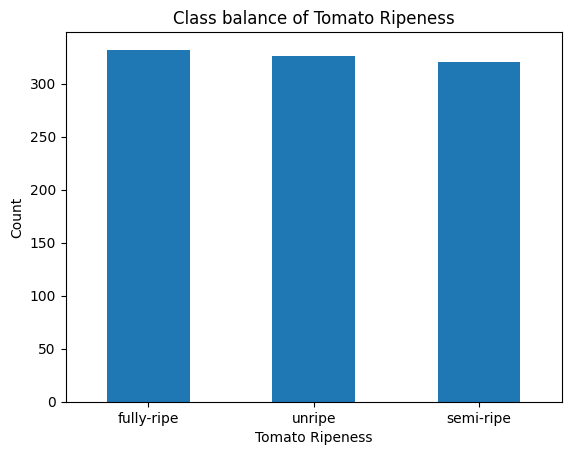

In [93]:
sampled_df['cat_name'].value_counts().plot(kind='bar')

plt.xticks(rotation=360)
plt.xlabel("Tomato Ripeness")
plt.ylabel("Count")
plt.title("Class balance of Tomato Ripeness")

plt.show()

In [94]:
dataset.df = sampled_df
dataset.df

img_folder  \
0    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
2    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
3    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
4    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
..                                                ...   
973  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
974  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
975  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
976  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
977  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   

                              img_filename img_path  img_id  img_width  \
0    stereo20190405_135700_p0_snap_169.jpg              131       2000   
1    stereo20190406_054921_p0_snap_830.jpg              207       2000   
2    stereo20190406_054921_p0_snap_950.jpg              210       2000   
3    stereo20190406_065607_p0_snap_043.jpg              230       2000   
4    stereo20190406_065607_p0_snap_362.jpg              266       2000   
..                                     ...      ...     ...        ...   
973  stereo20190406_065607_p0_snap_196.jpg              251       2000   
974  stereo20190406_065607_p0_snap_078.jpg              235       2000   
975  stereo20190406_054921_p0_snap_401.jpg              168       2000   
976  stereo20190406_054921_p0_snap_416.jpg              172       2000   
977  stereo20190406_065607_p0_snap_164.jpg              248       2000   

     img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
0          2000                                   1884           1724  ...   
1          2000                                   1163           1194  ...   
2          2000                                   1754           1633  ...   
3          2000                                   1657            661  ...   
4          2000                                    878           1187  ...   
..          ...       ...           ...            ...            ...  ...   
973        2000                                   1787            835  ...   
974        2000                                   1831            441  ...   
975        2000                                   1408           1494  ...   
976        2000                                   1257            598  ...   
977        2000                                   1422           1864  ...   

     ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  ann_difficult  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
..           ...            ...       ...            ...            ...   
973                                                                       
974                                                                       
975                                                                       
976                                                                       
977                                                                       

    cat_id    cat_name cat_supercategory split annotated  
0        3  fully-ripe            tomato               1  
1        1      unripe            tomato               1  
2        1      unripe            tomato               1  
3        2   semi-ripe            tomato               1  
4        1      unripe            tomato               1  
..     ...         ...               ...   ...       ...  
973      2   semi-ripe            tomato               1  
974      1      unripe            tomato               1  
975      3  fully-ripe            tomato               1  
976      3  fully-ripe            tomato 

In [102]:
# export dataframe to coco instance
dataset.export.ExportToCoco(cat_id_index=1)

f:\Code Repos\CSCI316-Proj2\venv\Lib\site-packages\pylabel\exporter.py:767: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r"^\s*$", np.nan, regex=True)
Exporting to COCO file...:   0%|          | 0/978 [00:00<?, ?it/s]

Exporting to COCO file...: 100%|██████████| 978/978 [00:00<00:00, 5782.65it/s]


['tomatod\\annotations\\BCCD_coco.json']

### Data Augmentation

## Object Detection

_Is that a tomato?_

Training a detectron2 model to identify tomatos and its ripeness status

#### Using Sampled Dataset

Since we removed certain unripe instances, not all images will be tagged completely.
This may have resulted in a loss of data but may increase accuracy and reduce bias

In [103]:
# Load dataset
dataset = importer.ImportCoco("tomatod\\annotations\sampled_tomatOD_train_COCO.json", path_to_images=PATH_TO_IMAGES, name="sampled_coco")
dataset.df

img_folder  \
id                                                      
0    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
1    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
2    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
3    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
4    F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
..                                                ...   
973  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
974  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
975  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
976  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   
977  F:\Code Repos\CSCI316-Proj2\tomatod\images\train   

                              img_filename img_path  img_id  img_width  \
id                                                                       
0    stereo20190405_135700_p0_snap_169.jpg              131       2000   
1    stereo20190405_135700_p0_snap_169.jpg              131       2000   
2    stereo20190405_135700_p0_snap_169.jpg              131       2000   
3    stereo20190405_135700_p0_snap_169.jpg              131       2000   
4    stereo20190405_135700_p0_snap_169.jpg              131       2000   
..                                     ...      ...     ...        ...   
973  stereo20190405_133623_p1_snap_041.jpg               26       2000   
974  stereo20190406_054921_p0_snap_785.jpg              202       2000   
975  stereo20190405_133623_p3_snap_031.jpg              102       2000   
976  stereo20190405_133623_p3_snap_031.jpg              102       2000   
977  stereo20190405_133623_p2_snap_068.jpg               64       2000   

     img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                                     ...   
0          2000                                   1884           1724  ...   
1          2000                                    535            749  ...   
2          2000                                   1759           1700  ...   
3          2000                                    610            879  ...   
4          2000                                    175           1378  ...   
..          ...       ...           ...            ...            ...  ...   
973        2000                                   1274           1863  ...   
974        2000                                    463            532  ...   
975        2000                                    630           1053  ...   
976        2000                                   1784           1006  ...   
977        2000                                    320           1128  ...   

     ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  ann_difficult  \
id                                                                        
0            0.0                                                          
1            0.0                                                          
2            0.0                                                          
3            0.0                                                          
4            0.0                                                          
..           ...            ...       ...            ...            ...   
973          0.0                                                          
974          0.0                                                          
975          0.0                                                          
976          0.0                                                          
977          0.0                                                          

    cat_id    cat_name cat_supercategory split annotated  
id                                                        
0        3  fully-ripe            tomato               1  
1        1      unripe            tomato               1  
2        3  fully-ripe            tomato               1  
3        1      unripe            tomato            

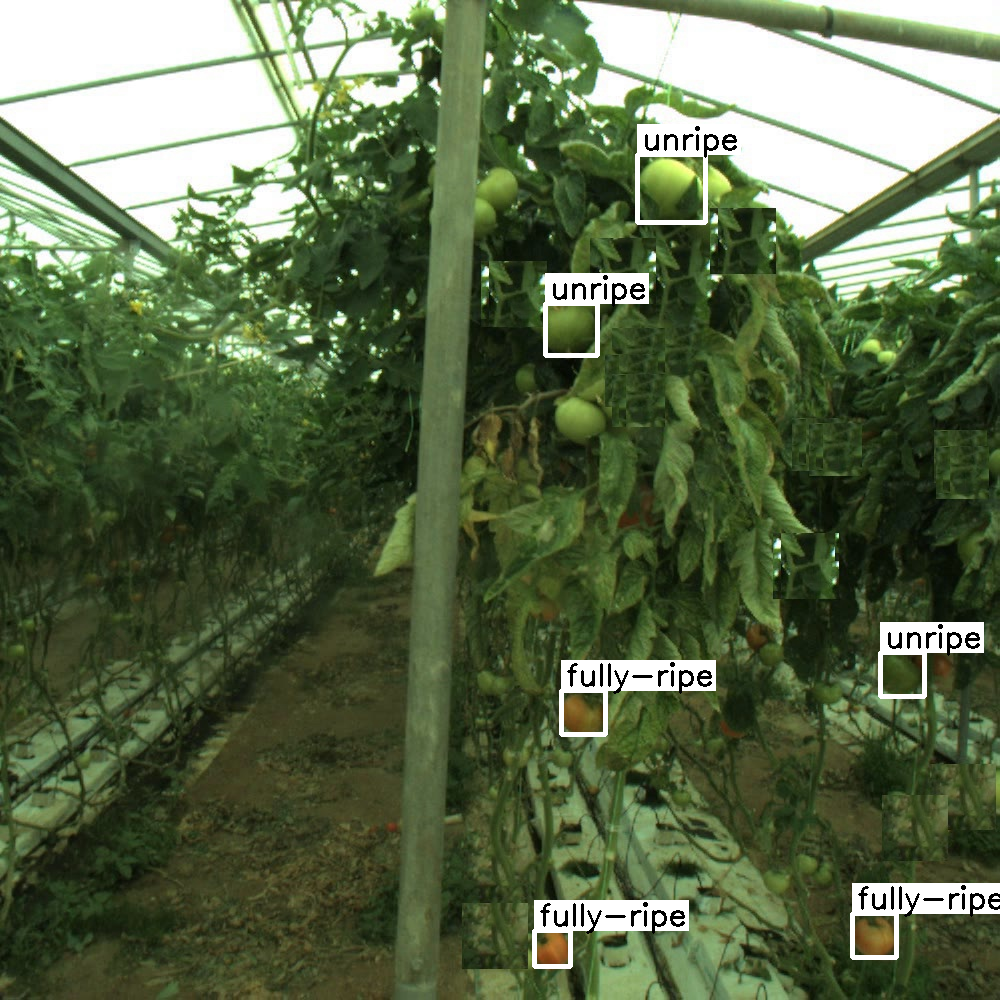

In [104]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(0))

#### Initalizing detectron2 instance

In [113]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
import cv2

In [109]:
register_coco_instances("tomatod", {}, "tomatod\\annotations\\sampled_tomatOD_train_COCO.json", "tomatod\\images\\train")

AssertionError: Dataset 'tomatod' is already registered!

In [115]:
tomato_meta = MetadataCatalog.get("tomatod"),
tomato_meta

(namespace(name='tomatod',
           json_file='tomatod\\annotations\\sampled_tomatOD_train_COCO.json',
           image_root='tomatod\\images\\train',
           evaluator_type='coco',
           thing_classes=['unripe', 'semi-ripe', 'fully-ripe'],
           thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2}),)

In [119]:
dataset_dicts = DatasetCatalog.get("tomatod")
dataset_dicts

[{'file_name': 'tomatod\\images\\train\\stereo20190405_132743_p0_snap_488.jpg',
  'height': 1000,
  'width': 1000,
  'image_id': 0,
  'annotations': [{'iscrowd': 0.0,
    'bbox': [852, 913, 44, 44],
    'category_id': 2,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0.0,
    'bbox': [534, 930, 36, 36],
    'category_id': 2,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0.0,
    'bbox': [880, 652, 44, 44],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0.0,
    'bbox': [637, 154, 68, 68],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0.0,
    'bbox': [561, 690, 44, 44],
    'category_id': 2,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>},
   {'iscrowd': 0.0,
    'bbox': [545, 303, 52, 52],
    'category_id': 0,
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': 'tomatod\\images\\train\\stereo20190405_132743_p0_snap_493.jpg',
  'height': 1000,
  'width': 1000,
  'image_id': 1,
  'annotations': [{'iscrowd':

#### Training Model

In [140]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("tomatod",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

FileNotFoundError: [Errno 2] No such file or directory: 'detectron2\\Base-RCNN-FPN.yaml'